## 分析当前数据

In [83]:
import pandas as pd
import numpy as np

data_org = pd.read_csv("COVID19_line_list_data.csv")

data_org.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01-03-2020,...,01-11-2020,12/29/2019,01-04-2020,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,1/15/2020,NaN,01-12-2020,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01-04-2020,...,1/17/2020,NaN,01-03-2020,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [84]:
column_names = data_org.columns
column_names

Index(['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary',
       'location', 'country', 'gender', 'age', 'symptom_onset',
       'If_onset_approximated', 'hosp_visit_date', 'exposure_start',
       'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered',
       'symptom', 'source', 'link'],
      dtype='object')

In [85]:
infos= data_org.info()
infos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1085 non-null   int64  
 1   case_in_country        888 non-null    float64
 2   reporting date         1084 non-null   object 
 3   Unnamed: 3             0 non-null      float64
 4   summary                1080 non-null   object 
 5   location               1085 non-null   object 
 6   country                1085 non-null   object 
 7   gender                 902 non-null    object 
 8   age                    843 non-null    float64
 9   symptom_onset          563 non-null    object 
 10  If_onset_approximated  560 non-null    float64
 11  hosp_visit_date        507 non-null    object 
 12  exposure_start         128 non-null    object 
 13  exposure_end           341 non-null    object 
 14  visiting Wuhan         1085 non-null   int64  
 15  from

In [86]:
descr = data_org.describe()
descr

,id,case_in_country,Unnamed: 3,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,1085.000000,888.000000,0.0,843.000000,560.000000,1085.000000,1081.000000
mean,543.000000,48.841216,NaN,49.483689,0.042857,0.176959,0.144311
std,313.356825,78.853528,NaN,18.255334,0.202716,0.381810,0.351567
min,1.000000,1.000000,NaN,0.250000,0.000000,0.000000,0.000000
25%,272.000000,11.000000,NaN,35.000000,0.000000,0.000000,0.000000
50%,543.000000,28.000000,NaN,51.000000,0.000000,0.000000,0.000000
75%,814.000000,67.250000,NaN,64.000000,0.000000,0.000000,0.000000
max,1085.000000,1443.000000,NaN,96.000000,1.000000,1.000000,1.000000


## 数据清理

In [87]:
# 根据题目要求删除没有用的列
dataset = data_org.drop(['case_in_country','id', 'Unnamed: 3', 'If_onset_approximated', 'summary', 'source', 'link'], axis=1)

# 日期变成统一格式
dataset['reporting date'] = pd.to_datetime(dataset['reporting date'], errors='coerce')
dataset['hosp_visit_date'] = pd.to_datetime(dataset['hosp_visit_date'], errors='coerce')
dataset['symptom_onset'] = pd.to_datetime(dataset['symptom_onset'], errors='coerce')
dataset['exposure_start'] = pd.to_datetime(dataset['exposure_start'], errors='coerce')
dataset['exposure_end'] = pd.to_datetime(dataset['exposure_end'], errors='coerce')
dataset['recovered_date'] = pd.to_datetime(dataset['recovered'], errors='coerce')



# 把治愈和死亡中的具体日期转变为1来和其他保持一致
# 先将 death 列转换为字符串类型
dataset['death'] = dataset['death'].astype(str)
dataset['recovered'] = dataset['recovered'].astype(str)
# 使用 pandas 的 apply 函数将非 "0" 和非 "1" 的所有值转换为1
dataset['death'] = dataset['death'].apply(lambda x: 1 if x not in ['0', '1'] else int(x))
dataset['recovered'] = dataset['recovered'].apply(lambda x: 1 if x not in ['0', '1'] else int(x))

# 再将数据类型转回 int
dataset['death'] = dataset['death'].astype(int)
dataset['recovered'] = dataset['recovered'].astype(int)
# 症状一栏分为有无症状0/1
dataset['symptom'] = dataset['symptom'].notna().astype(int)

In [88]:
# 垃圾值处理
# 好多个1899年的日期
# 垃圾值处理
# 好多个1899年的日期
dataset = dataset[dataset['reporting date'].isna() | ((dataset['reporting date'].dt.year >= 2020) & (dataset['reporting date'].dt.year <= 2023))]
dataset = dataset[dataset['hosp_visit_date'].isna() | ((dataset['hosp_visit_date'].dt.year >= 2020) & (dataset['hosp_visit_date'].dt.year <= 2023))]
dataset = dataset[dataset['symptom_onset'].isna() | ((dataset['symptom_onset'].dt.year >= 2020) & (dataset['symptom_onset'].dt.year <= 2023))]
dataset = dataset[dataset['exposure_start'].isna() | ((dataset['exposure_start'].dt.year >= 2020) & (dataset['exposure_start'].dt.year <= 2023))]
dataset = dataset[dataset['exposure_end'].isna() | ((dataset['exposure_end'].dt.year >= 2020) & (dataset['exposure_end'].dt.year <= 2023))]
dataset = dataset[dataset['recovered_date'].isna() | ((dataset['recovered_date'].dt.year >= 2020) & (dataset['recovered_date'].dt.year <= 2023))]


In [89]:
dataset

,reporting date,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,recovered_date
1,2020-01-20,Shanghai,China,female,56.0,2020-01-15,2020-01-15,NaT,2020-01-12,0,1.0,0,0,0,NaT
2,2020-01-21,Zhejiang,China,male,46.0,2020-01-04,2020-01-17,NaT,2020-01-03,0,1.0,0,0,0,NaT
3,2020-01-21,Tianjin,China,female,60.0,NaT,2020-01-19,NaT,NaT,1,0.0,0,0,0,NaT
4,2020-01-21,Tianjin,China,male,58.0,NaT,2020-01-14,NaT,NaT,0,0.0,0,0,0,NaT
5,2020-01-21,Chongqing,China,female,44.0,2020-01-15,NaT,NaT,NaT,0,1.0,0,0,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2020-02-25,Innsbruck,Austria,NaN,24.0,NaT,NaT,NaT,NaT,0,0.0,0,0,0,NaT
1081,2020-02-24,Afghanistan,Afghanistan,NaN,35.0,NaT,NaT,NaT,NaT,0,0.0,0,0,0,NaT
1082,2020-02-26,Algeria,Algeria,male,NaN,NaT,NaT,NaT,2020-02-17,0,0.0,0,0,0,NaT
1083,2020-02-25,Croatia,Croatia,male,NaN,NaT,NaT,2020-02-19,2020-02-21,0,0.0,0,0,0,NaT


In [90]:


# 缺失值处理 - 三种情况 删除/填充（平均数/中位数/众数）
# 对于缺失值很少的，直接删除
dataset.dropna(subset=["from Wuhan"], inplace=True)
dataset.dropna(subset=["reporting date"], inplace=True)

# 对于缺失值有点多的，找合适方法填补
# 对性别 使用众数填充缺失值
mode_gender = dataset['gender'].mode()[0]
dataset['gender'].fillna(mode_gender, inplace=True)
# 对年龄 使用中位数补充缺失值
median_age = dataset['age'].median()
dataset['age'].fillna(median_age, inplace=True)



In [91]:
# 然后用平均值进行填充
dataset['reporting date'] = (dataset['reporting date'] - pd.Timestamp("2019-01-20")) // pd.Timedelta('1D')
dataset['symptom_onset'] = (dataset['symptom_onset'] - pd.Timestamp("2019-01-20")) // pd.Timedelta('1D')
dataset['hosp_visit_date'] = (dataset['hosp_visit_date'] - pd.Timestamp("2019-01-20")) // pd.Timedelta('1D')
dataset['exposure_start'] = (dataset['exposure_start'] - pd.Timestamp("2019-01-20")) // pd.Timedelta('1D')
dataset['exposure_end'] = (dataset['exposure_end'] - pd.Timestamp("2019-01-20")) // pd.Timedelta('1D')
dataset['recovered_date'] = (dataset['recovered_date'] - pd.Timestamp("2019-01-20")) // pd.Timedelta('1D')

from sklearn.impute import SimpleImputer

# 使用平均值填充数值型变量的缺失值
num_imputer = SimpleImputer(strategy='mean')
dataset[['reporting date', 'symptom_onset', 'hosp_visit_date', 'exposure_start', 'exposure_end', 'recovered_date']] = num_imputer.fit_transform(dataset[['reporting date', 'symptom_onset', 'hosp_visit_date', 'exposure_start', 'exposure_end','recovered_date']])

In [92]:
# 后续其他处理
dataset['from Wuhan'] = dataset['from Wuhan'].astype(int)
dataset['age'] = dataset['age'].astype(int)
# 将male转换为0,female转换为1
dataset['gender'] = dataset['gender'].replace({'male': 0, 'female': 1})


## 清理后的数据

In [93]:
# locatioin和 country种类过多且不是很重要的目标，所以删除
data = dataset.drop(['location','country'], axis=1)
data

,reporting date,gender,age,symptom_onset,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,recovered_date
1,365.0,1,56,360.000000,360.00000,367.483871,357.000000,0,1,0,0,0,392.15
2,366.0,0,46,349.000000,362.00000,367.483871,348.000000,0,1,0,0,0,392.15
3,366.0,1,60,375.769517,364.00000,367.483871,369.315476,1,0,0,0,0,392.15
4,366.0,0,58,375.769517,359.00000,367.483871,369.315476,0,0,0,0,0,392.15
5,366.0,1,44,360.000000,378.12731,367.483871,369.315476,0,1,0,0,0,392.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,401.0,0,24,375.769517,378.12731,367.483871,369.315476,0,0,0,0,0,392.15
1081,400.0,0,35,375.769517,378.12731,367.483871,369.315476,0,0,0,0,0,392.15
1082,402.0,0,50,375.769517,378.12731,367.483871,393.000000,0,0,0,0,0,392.15
1083,401.0,0,50,375.769517,378.12731,395.000000,397.000000,0,0,0,0,0,392.15


## 数据分析和可视化

Text(0, 0.5, 'Cumulative Explained Variance')

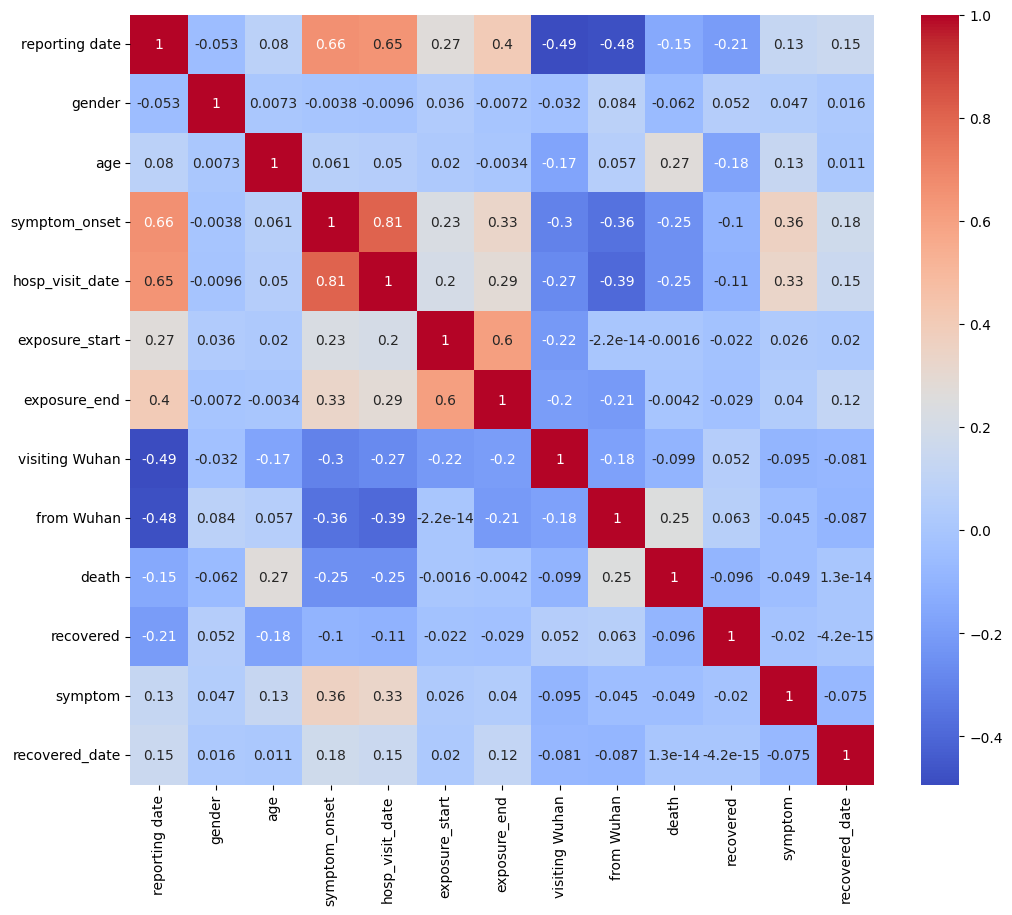

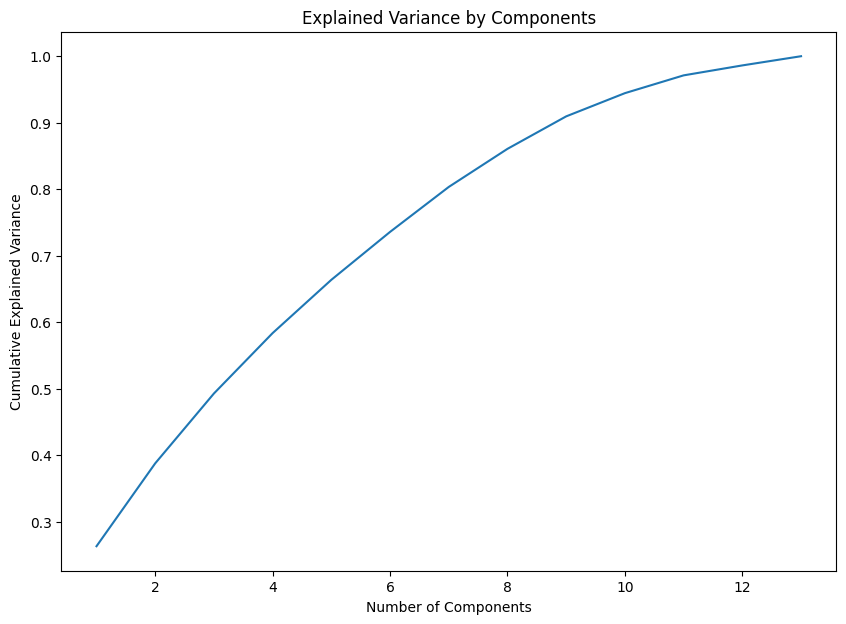

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA


# 计算所有变量的相关性
correlation = data.corr()

# 创建一个热图来可视化这些相关性
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

# 对数据进行标准化（去均值，单位方差）
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 执行PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# 创建一个折线图来显示每个主成分解释的方差
plt.figure(figsize=(10,7))
plt.plot(range(1, len(data_pca[0]) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')




对于图像的分析，这有些需要注意的点：

相关性热图：每个单元格的颜色表示两个变量之间的相关性。颜色越深，表示相关性越高。你可以找出相关性最高的一对变量。如果这两个变量与你感兴趣的目标变量（如death或recovered）高度相关，那么他们可能是预测目标变量的重要特征。

PCA图：曲线表示主成分解释的累积方差。一般来说，我们希望选择足够多的主成分，以解释数据中大部分的方差。例如，如果前三个主成分可以解释90%的方差，那么你可能就只需要考虑这三个主成分。在PCA图中，你应该找出在增加新的主成分后，累积方差增加得相对较少的点。这个点就是我们所说的“拐点”。通常情况下，选择主成分的数量就是找到这个“拐点”。

## 贝叶斯网络

In [95]:
# 获取所有访问过武汉的人的数据
wuhan_data = data[data['visiting Wuhan'] == 1]

# 如果一个人曾经访问过武汉，那么他有COVID-19症状的概率是多少？
symptom_rate = wuhan_data['symptom'].mean()

# 如果一个人曾经访问过武汉且有COVID-19症状，那么他确实是患者的概率是多少？
patient_rate = wuhan_data[wuhan_data['symptom'] == 1]['from Wuhan'].mean()

# 如果一个人曾经访问过武汉，那么他死亡的概率是多少？
death_rate = wuhan_data['death'].mean()

# 如果一个人曾经访问过武汉，那么他的平均恢复时间是多少？
# 这里我假设 recovery time 是 reporting date 和 recovered 之间的差
wuhan_data['recovery_time'] = wuhan_data['recovered_date'] - wuhan_data['reporting date']
average_recovery_time = wuhan_data['recovery_time'].mean()

print("If a person has visited Wuhan, the probability of having COVID-19 symptoms is:", symptom_rate)
print("If a person has visited Wuhan and has COVID-19 symptoms, the probability of being a patient is:", patient_rate)
print("If a person has visited Wuhan, the probability of death is:", death_rate)
print("If a person has visited Wuhan, the average recovery time is:", average_recovery_time)


wuhan_data


If a person has visited Wuhan, the probability of having COVID-19 symptoms is: 0.15675675675675677
If a person has visited Wuhan and has COVID-19 symptoms, the probability of being a patient is: 0.034482758620689655
If a person has visited Wuhan, the probability of death is: 0.005405405405405406
If a person has visited Wuhan, the average recovery time is: 18.82837837837836


C:\Users\13496\AppData\Local\Temp\ipykernel_36024\2168964781.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wuhan_data['recovery_time'] = wuhan_data['recovered_date'] - wuhan_data['reporting date']


,reporting date,gender,age,symptom_onset,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,recovered_date,recovery_time
3,366.0,1,60,375.769517,364.00000,367.483871,369.315476,1,0,0,0,0,392.15,26.15
7,366.0,0,37,359.000000,365.00000,355.000000,356.000000,1,0,0,0,0,392.15,26.15
8,366.0,0,39,354.000000,359.00000,348.000000,349.000000,1,0,0,0,0,392.15,26.15
9,366.0,0,56,361.000000,365.00000,353.000000,361.000000,1,0,0,0,0,392.15,26.15
10,366.0,1,18,364.000000,365.00000,357.000000,362.000000,1,0,0,0,0,392.15,26.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,378.0,0,50,375.769517,378.12731,367.483871,369.000000,1,0,0,0,0,392.15,14.15
991,379.0,0,50,375.769517,378.12731,367.483871,369.315476,1,0,0,0,0,392.15,13.15
994,381.0,1,60,375.769517,378.12731,367.483871,365.000000,1,0,0,0,0,392.15,11.15
1030,376.0,1,25,372.000000,378.12731,367.483871,369.000000,1,0,0,0,1,392.15,16.15


## 机器学习

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# outcome - died or not died
# 拆分训练集和测试集
# 将数据集划分为特征和目标变量
X = data.drop('death', axis=1)
y = data['death']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 K-最近邻（K-NN）分类器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

# 使用贝叶斯分类器
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)

- 混淆矩阵：它是一种特定的表格布局，使得视觉化工具和机器学习算法的性能更加容易。在这个矩阵中，每一行代表一个类的实例，而每一列代表一个类的预测。

- 精度（Accuracy）：它是所有预测正确的观察值占总观察值的比例。在您的例子中，K-NN的精度为96.2%，Naive Bayes的精度为44.8%。

- 召回率（Recall）：也被称为敏感性，真阳性率或命中率。这是实际正类中被正确预测的正类比例。

- F1分数：这是精度和召回率的加权平均值。它试图将精度和召回率的值平衡为一个数值。F1分数的最佳值是1，最差值是0。

In [97]:
# 验证预测结果
# 分别计算 混淆矩阵、精确度、召回率、F1
from sklearn import metrics

# 计算 K-NN 模型的指标
print("K-NN Metrics:")
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, knn_predictions))
print("Accuracy:", metrics.accuracy_score(y_test, knn_predictions))
print("Precision:", metrics.precision_score(y_test, knn_predictions, average='weighted'))
print("Recall:", metrics.recall_score(y_test, knn_predictions, average='weighted'))
print("F1 Score:", metrics.f1_score(y_test, knn_predictions, average='weighted'))

# 计算贝叶斯模型的指标
print("\nNaive Bayes Metrics:")
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, nb_predictions))
print("Accuracy:", metrics.accuracy_score(y_test, nb_predictions))
print("Precision:", metrics.precision_score(y_test, nb_predictions, average='weighted'))
print("Recall:", metrics.recall_score(y_test, nb_predictions, average='weighted'))
print("F1 Score:", metrics.f1_score(y_test, nb_predictions, average='weighted'))


K-NN Metrics:
Confusion Matrix:
 [[196   3]
 [  5   8]]
Accuracy: 0.9622641509433962
Precision: 0.959925927822295
Recall: 0.9622641509433962
F1 Score: 0.9607861635220126

Naive Bayes Metrics:
Confusion Matrix:
 [[ 82 117]
 [  0  13]]
Accuracy: 0.4481132075471698
Precision: 0.9448113207547171
Recall: 0.4481132075471698
F1 Score: 0.5589904958400225


从这些指标中，我们可以看到K-NN模型在这个任务上表现较好。它的准确度，精度，召回率和F1分数都明显高于贝叶斯分类器。这可能是因为K-NN算法对这个特定的问题更合适，或者是因为贝叶斯分类器的参数没有很好地调整。

In [98]:
# 预测年龄
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 把 'age' 列设置为目标变量，其他列作为特征
X = data.drop('age', axis=1)
y = data['age']

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用线性回归模型
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

# 计算均方误差
mse = mean_squared_error(y_test, lr_predictions)
print('Mean Squared Error:', mse)


Mean Squared Error: 235.88625026912996


轮廓系数是评估聚类结果质量的一个常用指标。它的值在-1到1之间，值越大，说明聚类结果越好。

在确定最佳的簇数量时，我们可以尝试不同的簇数量，然后计算每个簇数量下的轮廓系数，选择轮廓系数最大的那个簇数量作为最佳的簇数量。

c:\Users\13496\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\13496\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\13496\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\13496\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

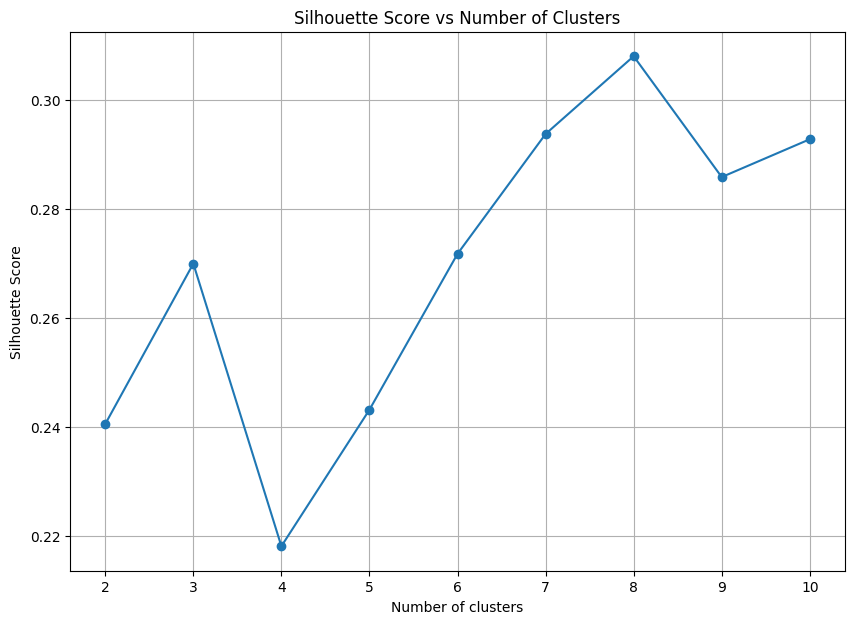

In [101]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 存储每个簇数量下的轮廓系数
silhouette_scores = []

# 尝试不同的簇数量
for n_clusters in range(2, 11):
    # 创建一个 KMeans 实例
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    
    # 训练模型
    kmeans.fit(data_scaled)
    
    # 计算轮廓系数
    score = silhouette_score(data_scaled, kmeans.labels_)
    
    # 存储轮廓系数
    silhouette_scores.append(score)

# 画出每个簇数量下的轮廓系数
plt.figure(figsize=(10,7))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.grid()


c:\Users\13496\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Clustering Results with 8 clusters')

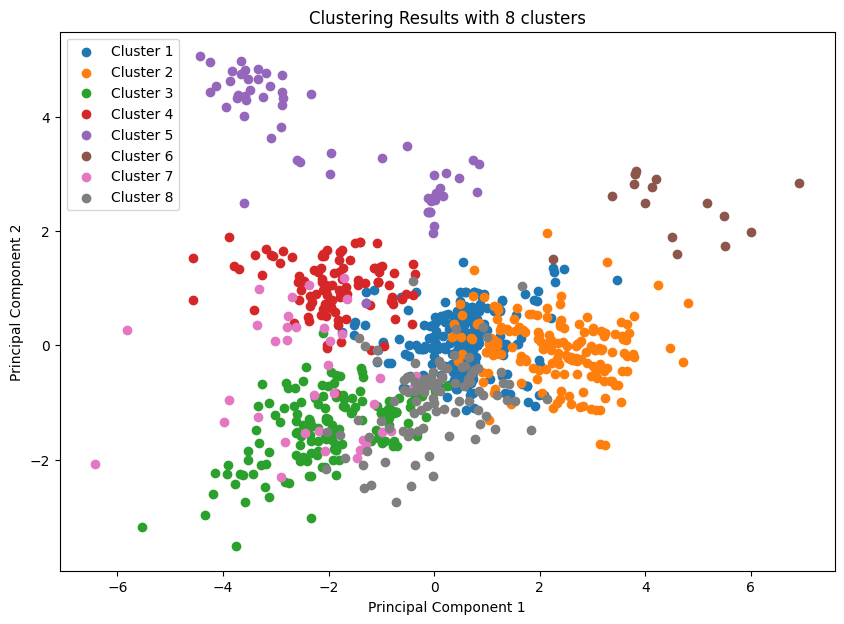

In [102]:
from sklearn.decomposition import PCA

# 创建一个KMeans实例，并设置簇的数量为8
kmeans = KMeans(n_clusters=8, random_state=0)

# 训练模型
kmeans.fit(data_scaled)

# 使用PCA降维
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# 用不同的颜色表示各个簇
plt.figure(figsize=(10,7))
for i in range(8):
    plt.scatter(data_pca[kmeans.labels_ == i, 0], data_pca[kmeans.labels_ == i, 1], label='Cluster ' + str(i+1))
plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results with 8 clusters')


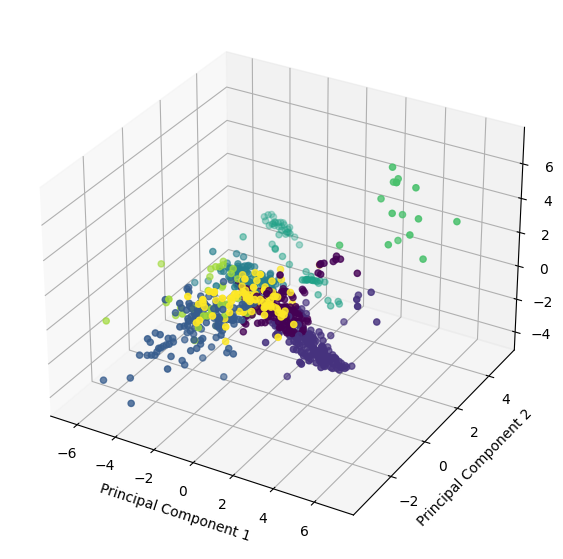

In [108]:
# 三维炫技
from mpl_toolkits.mplot3d import Axes3D

# 将数据映射到前三个主成分
pca_3 = PCA(n_components=3)
data_pca_3 = pca_3.fit_transform(data_scaled)

# 创建3D图
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 提取各主成分
x = data_pca_3[:, 0]
y = data_pca_3[:, 1]
z = data_pca_3[:, 2]

# 根据簇的标签给每个点分配颜色
ax.scatter(x, y, z, c=kmeans.labels_, cmap='viridis')

# 设置轴标签
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# 显示图像
plt.show()


## 改进结果和理论形式

A. The data is unbalanced. You can balance it by reducing randomly the majority class. 
Assume that you extract randomly samples that are balanced. How the prediction results 
will change?

有可能丢弃一些重要信息。因此，预测结果可能会有所变化，取决于丢弃的是否是关键数据

B. How you can better mange the missing values?

就像我在前几个练习里使用地那样，常见的有删除含有缺失值的行、使用统计值（如均值、众数、中位数）进行填充、使用模型进行预测填充等。
还可以使用K-NN进行填充

C. To find the best parameters for the models, the Grid-search algorithm can be used 
which is available in scikit-learn library. Explain the algorithm and use it for the learning models to find the best parameters.

算法原理：网格搜索（Grid Search）是一种用来确定最优超参数的方法。它会生成一个超参数网格，然后尝试所有的组合，最后返回表现最好的一组超参数：
- 设定超参数的可能取值范围；
- 对每一组超参数组合进行模型训练和验证；
- 选择验证结果最好的那组超参数。

In [110]:
# 网格搜索改进K-NN
from sklearn.model_selection import GridSearchCV

# 对于K-NN模型，我们可以调整的参数可能是n_neighbors
knn_params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# 使用GridSearchCV找到最优参数
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)

# 输出最优参数
print("Best Parameters for K-NN: ", knn_grid.best_params_)


c:\Users\13496\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters for K-NN:  {'n_neighbors': 10}


D. Give the algorithmically (mathematical) formalism of the method which give the best results. Explain all the parameters of the used method and their impact on the results. Some comparison with public results should me made to conclude the project.
